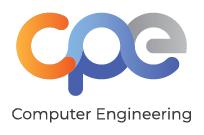

# Assignment9 Graph

## The Graph ADT ###

**A graph** is a collection of **vertices** and **edges** by a combination of 2 data types:  
* **A Vertex** is a lightweight object that stores an arbitrary element provided by the user  
* **An Edge** stores an associated object with addition with the following methods:
  * **endpoints( )**: Return a tuple __(u,v)__ such that *vertex __u__* is the origin of the edge and *vertex __v__* is the destination; for an undirected graph, the orientation is arbitrary.
  * **opposite(v)**: Assuming *vertex __v__* is one endpoint of the edge (either origin or destination), return the other endpoint.
 
* **vertex_count()**: Return the number of vertices of the graph.
* **vertices( )**: Return an iteration of all the vertices of the graph.
* **edge_count()**: Return the number of edges of the graph.
* **edges( )**: Return an iteration of all the edges of the graph.
* **get_edge(u,v)**: Return the edge from *vertex __u__* to *vertex __v__*, if one exists; otherwise return **None**. For an undirected graph, there is no difference between get **edge(u,v)** and get **edge(v,u)**.
* **degree(v, out=True)**: For an undirected graph, return the number of edges incident to *vertex __v__*. For a directed graph, return the number of outgoing(resp. incoming) edges incident to *vertex __v__*, as designated by the optional parameter.
* **incident_edges(v, out=True)**: Return an iteration of all edges incident to *vertex __v__*. In the case of a directed graph, report outgoing edges by default; report incoming edges if the optional parameter is set to False.
* **insert_vertex(x=None)**: Create and return a new Vertex storing *element __x__*.
* **insert_edge(u, v, x=None)**: Create and return a new Edge from *vertex __u__* to *vertex __v__*, storing *element __x__* *(None by default)*.
* **remove_vertex(v)**: Remove *vertex __v__* and all its incident edges from the graph.
* **remove_edge(e)**: Remove *edge __e__* from the graph.

### สิ่งที่ได้จากการเรียนในวันนี้

### Graph Implementation
* ตามทฤษฏี กราฟ ประกอบไปด้วย Vertex กับ Edge
* กราฟ มีสองประเภท คือ Directed Graph ก็คือมีเส้นทางไปกลับ และ Undirected Graph ไม่มีลูกศรไปกลับ

* มีวิธีในการ Implement Graph ADT ทั้งหมด 4 วิธี
1. Edge List - เก็บข้อมูล Edge เป็นหลัก ดูว่า Connected ระหว่างตัวอะไร
2. Adjacency List - จะมอง Vertex เป็นหลัก รู้ว่ามี edge ใดเชื่อมอยู่ (แต่ไม่บอกจุดปลาย) ข้อเสียคือ ต้อง search หาจุดปลายเอง
3. Adjacency Map - ใช้ Hash-map เพื่อเก็บ Vertex เป็นหลัก และจะรู้ edge กับจุดปลาย
4. Adjacency Matrix - ใช้ Matrix มา Access ข้อมูลต่างๆ แต่ข้อเสียคือ เปลือง Memory

* Graph Traversal แบ่งได้เป็นสองประเภท
1. Depth-First Search Algorithm (DFS) - เขียน forward edge และ back edge ถ้าหากเดินไปตามเส้นแล้วทางเดิมจะเดินย้อนกลับจากเส้นทางที่เคยมา
2. Breadth-First Search Algorithm (BFS) - เป็นการไล่ลำดับชั้นไปเรื่อยๆ ข้อดีคือ Shortest-Path เป็นเลขจำนวนชั้น (แต่ในกรณีที่กราฟเรามี weight เป็น 1 เท่ากันทุกเส้น)

* Transitive Closure คือ การดูว่า Vertex นึงสามารถเดินทางไปอีก Vertext ได้หรือไม่ (ไม่ว่าจะใช้เส้นทางใดก็ตาม)
* การหา Transitive Closure จะอาศัย Warshall's Algorithm โดยใช้ Matrix


# Implement of Graphs by adjacency matrix 

In [109]:
from CPE112.Array import Matrix
class Graph:
    def __init__(self,maxVertices,directed=False):
        self._Vertices = list()
        self._MATRIX = Matrix(maxVertices,maxVertices) # Adjacency Matrix
        self._MATRIX.clear(None)
        self._directed = directed
#------------------------- Vertex class -----------------------
    class Vertex:
        __slots__ = '_element'

        def __init__(self, x):
            self._element = x

        def element(self):
            return self._element
        
        def __repr__(self):
            return str(self._element)
#------------------------- Edge class -------------------------
    class Edge:
        __slots__ = '_origin' , '_destination', '_element'

        def __init__(self, u, v, w):
            self._origin = u
            self._destination = v
            self._element = w

        def endpoints(self):
            return (self._origin, self._destination)

        def opposite(self, v):
            return self._destination if v is self._origin else self._origin

        def element(self):
            return self._element
        
        def __repr__(self):
            return str(self._element)
#-----------------------------------------------------------
    def is_directed(self):
        return self._directed

    def findindex(self,v):
        if v in self._Vertices:
            return self._Vertices.index(v)
#-------------------------------------------------------------------------        
    def vertex_count(self):
        return len(self._Vertices)
    
    def vertices(self):
        return self._Vertices
    
    def edge_count(self):
        total = 0
        for row in range(self.vertex_count()):
            for col in range(self.vertex_count()):
                if self._MATRIX[row,col] != None:
                    total += 1
        return total if self.is_directed() else total // 2

    def edges(self):
        edges_list = list()
        for row in range(self.vertex_count()):
            for col in range(self.vertex_count()):
                # วนลูปเข้าไปใน Adjacency Matrix เพื่อเช็คว่ามีค่า edge ระหว่างสอง Vertex
                if (self._MATRIX[row,col] not in edges_list) and (self._MATRIX[row,col] is not None):
                    edges_list.append(self._MATRIX[row,col])
        return edges_list
    
    def get_edge(self, u, v): # เช็คว่ามี Edge ไหม Return true / false
        return self._MATRIX[self.findindex(u),self.findindex(v)]
    
    def degree(self, v, outgoing=True):
        total = 0
        if outgoing: # Edge ที่พุ่งออก
            for col in range(self.vertex_count()):
                if self._MATRIX[self.findindex(v),col] != None:
                    total += 1
        #incoming
        else:
            for row in range(self.vertex_count()):
                if self._MATRIX[row,self.findindex(v)] != None:
                    total += 1
                    
        return total

    def incident_edges(self, v, outgoing=True):
        adj = list()
        if outgoing:
            # พุ่งออกคือ กำหนดให้มันเป็นฝั่งแถว แล้ววนตาม col
            for col in range(self.vertex_count()):
                if self._MATRIX[self.findindex(v),col] != None:
                    adj.append(self._MATRIX[self.findindex(v),col])
        #incoming
        else:
            for row in range(self.vertex_count()):
                if self._MATRIX[row,self.findindex(v)] != None:
                    adj.append(self._MATRIX[row,self.findindex(v)])
        return adj
    
    def insert_vertex(self, x):
        v = self.Vertex(x)
        self._Vertices.append(v) # ถ้าใช้ Array จะนั่นและ assign index ลงไปก็ได้เช่นกัน
        return v

    def insert_edge(self, u, v, x):
        # u is origin
        # v is destination
        e = self.Edge(u, v, x)
        if self.is_directed():
            self._MATRIX[self.findindex(u),self.findindex(v)] = e
        else:
            self._MATRIX[self.findindex(u),self.findindex(v)] = e
            self._MATRIX[self.findindex(v),self.findindex(u)] = e
        return e

    def remove_vertex(self,v):
        # Keyword : Remove ทุกๆ Edge ที่มา Incident อยู่ด้วย 
        # สุดท้ายลบ Vertex ให้ออกไปจาก Vertrices List
        # 1. หาตำแหน่งของ Vertex ก่อน
        # 2. ทำการเช็คก่อนว่าตำแหน่งอยู่ที่ขอบไหม ถ้าอยู่ขอบก็ไม่จำเป็นต้อง Shift ค่า   
#           [ None, ab, ac, ad ]
#           [ ab, None, bc, bd ]
#           [ ac, bc, None, cd ]
#           [ ad, bd, cd, None ]

        ndx = self.findindex(v)
        # กรณีที่อยู่ขอบอยู่แล้ว 
        if (ndx == self.vertex_count() or ndx == self._MATRIX.numRows()):
            for i in range(self.vertex_count()):
                self._MATRIX[ndx,i] = None
                self._MATRIX[i,ndx] = None
        
        # กรณีไม่อยู่ที่ขอบ จะต้อง Shift ค่าด้วย
        else:  
            
            # Shift ค่าและเคลียร์ค่าในแนวตั้ง
            for i in range(self.vertex_count()):
                if (i < ndx):
                    self._MATRIX[ndx,i] = self._MATRIX[ndx+1,i] 
                    self._MATRIX[ndx+1,i] = None
                else:
                    self._MATRIX[ndx,i] = None

            # Shift ค่าและเคลียร์ค่าในแนวนอน 
            for j in range(self.vertex_count()):
                if (j < ndx):
                    self._MATRIX[j,ndx] = self._MATRIX[j,ndx+1]
                    self._MATRIX[j,ndx+1] = None
                else:
                    self._MATRIX[j,ndx] = None

            # สลับจุดที่เป็นขอบ เช่น Shift ค่าที่จุด (2,2) กับ (3,3)
            self._MATRIX[ndx,ndx] = self._MATRIX[ndx+1,ndx+1]
            self._MATRIX[ndx+1,ndx+1] = None        

        # ลบ Vertex ที่อยู่ใน List
        del self._Vertices[ndx]

        
    def remove_edge(self,e):
        # Keyword : เซ็ตค่าของ Edge ใน Matrix ให้เป็น None
        u , v = e.endpoints() # เอาตำแหน่ง Vertex ที่เชื่อมมา
        self._MATRIX[self.findindex(u),self.findindex(v)] = None
        self._MATRIX[self.findindex(v),self.findindex(u)] = None

    def DFS(self,u,discovered):
        print(u)
        for e in self.incident_edges(u):
            v = e.opposite(u)
            if v not in discovered:
                discovered[v] = e
                self.DFS(v,discovered)

    def BFS(self,s, discovered):
        level = [s]
        while len(level) > 0:
            next_level = []
            for u in level:
                print(u)
                for e in self.incident_edges(u):
                    v = e.opposite(u)
                    if v not in discovered:
                        discovered[v] = e
                        next_level.append(v)
                    level = next_level

    def warshall(self):
        n = self.vertex_count()
        newMatrix = Matrix(n,n)
        
        # คัดลอกใน _Matrix มาใส่ใน transitive_closure ก่อน 1 รอบ

        for i in range(n):
            for j in range(n):
                if self._MATRIX[i,j] == None:
                    newMatrix[i,j] = 0
                else:
                    newMatrix[i,j] = 1

        print("Before Applying Warshall's Algorithm : ")
        print(newMatrix)

        for k in range(n):
            for i in range(n):
                for j in range(n):
                    newMatrix[i,j] = newMatrix[i,j] or (newMatrix[i,k] and newMatrix[k,j])

        #Return ค่า Transitive Closure
        return newMatrix 
                    
        
    def __repr__(self):
        s = '['
        for r in range(self._MATRIX.numRows()):
            for c in self._MATRIX._theRows[r]:
                if c is None:
                    c = 0
                s = s + str(c) + ', '
            s = s[:-2] + ' \n '
        s = s[:-3] + ' ]'
        return s

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice 1 </span>: Graph Implementation 
### ------------------------------------------------------------------------------------

Mission I: Complete __remove_vertex()__ and __remove_edge()__ method and implement the class's representation  
test the class's operation

In [92]:
g = Graph(4)
A = g.insert_vertex('A')
B = g.insert_vertex('B')
C = g.insert_vertex('C')
D = g.insert_vertex('D')

ab = g.insert_edge(A,B,'ab')
ac = g.insert_edge(A,C,'ac')
ad = g.insert_edge(A,D,'ad')
bc = g.insert_edge(B,C,'bc')
bd = g.insert_edge(D,B,'bd')
cd = g.insert_edge(C,D,'cd')

In [93]:
g._MATRIX

[ None, ab, ac, ad ]
[ ab, None, bc, bd ]
[ ac, bc, None, cd ]
[ ad, bd, cd, None ]

In [94]:
g.vertex_count()

4

In [95]:
g.vertices()

[A, B, C, D]

In [96]:
g

[0, ab, ac, ad 
 ab, 0, bc, bd 
 ac, bc, 0, cd 
 ad, bd, cd, 0 ]

In [97]:
g.remove_vertex(C)

In [98]:
g

[0, ab, ad, 0 
 ab, 0, bd, 0 
 ad, bd, 0, 0 
 0, 0, 0, 0 ]

In [99]:
g.vertices()

[A, B, D]

In [100]:
g.remove_edge(bd)
g

[0, ab, ad, 0 
 ab, 0, 0, 0 
 ad, 0, 0, 0 
 0, 0, 0, 0 ]

In [101]:
g.remove_vertex(D)

In [102]:
g

[0, ab, 0, 0 
 ab, 0, 0, 0 
 0, 0, 0, 0 
 0, 0, 0, 0 ]

---

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice2 </span>: Graph's Traversal 
### ------------------------------------------------------------------------------------



Practice II: include the __DFS()__ and __BFS()__ as the methods in Graph Class   
and test with this graph

![Graph](graph_ex1.jpg)

In [103]:
g = Graph(16) 
A = g.insert_vertex('A')
B = g.insert_vertex('B')
C = g.insert_vertex('C')
D = g.insert_vertex('D')
E = g.insert_vertex('E')
F = g.insert_vertex('F')
G = g.insert_vertex('G')
H = g.insert_vertex('H')
I = g.insert_vertex('I')
J = g.insert_vertex('J')
K = g.insert_vertex('K')
L = g.insert_vertex('L')
M = g.insert_vertex('M')
N = g.insert_vertex('N')
O = g.insert_vertex('O')
P = g.insert_vertex('P')

# ab,af,bc,bg,ch,dh,hl,kp,ol,no,mj,in,ej,fj,gj,fg,gk
ab = g.insert_edge(A,B,'ab')
af = g.insert_edge(A,F,'af')
bc = g.insert_edge(B,C,'bc')
bg = g.insert_edge(B,G,'bg')
ch = g.insert_edge(C,H,'ch')
dh = g.insert_edge(D,H,'dh')
hl = g.insert_edge(H,L,'hl')
kp = g.insert_edge(K,P,'kp')
ol = g.insert_edge(O,L,'ol')
no = g.insert_edge(N,O,'no')
mj = g.insert_edge(M,J,'mj')
In = g.insert_edge(I,N,'in')
ej = g.insert_edge(E,J,'ej')
fj = g.insert_edge(F,J,'fj')
gj = g.insert_edge(G,J,'gj')
fg = g.insert_edge(F,G,'fg')
gk = g.insert_edge(G,K,'gk')

In [104]:
g.DFS(A,{A:None}) # กำหนดค่า A เป็นค่าเริ่มต้น

A
B
C
H
D
L
O
N
I
G
F
J
E
M
K
P


In [105]:
g.BFS(A,{A:None}) # กำหนดค่า A เป็นค่าเริ่มต้น

A
B
F
C
G
J
H
K
E
M
D
L
P
O
N
I


### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice3 </span>: Transitive Closure
### ------------------------------------------------------------------------------------

Mission III: Create a belowed graph and code a warshall algorithm with matrix to find the transitive closure

![Graph](graph_ex2.jpg)

เขียน Warshall Algorithm ลงไว้ใน Method ของ Class Graph เรียบร้อยแล้วครับ

In [110]:
g = Graph(6,directed=True)
A = g.insert_vertex('A')
B = g.insert_vertex('B')
C = g.insert_vertex('C')
D = g.insert_vertex('D')
E = g.insert_vertex('E')
F = g.insert_vertex('F')

ab = g.insert_edge(A,B,'ab')
ad = g.insert_edge(A,D,'ad')
bc = g.insert_edge(B,C,'bc')
bd = g.insert_edge(B,D,'bd')
bf = g.insert_edge(B,F,'bf')
ca = g.insert_edge(C,A,'ca')
df = g.insert_edge(D,F,'df')
fe = g.insert_edge(F,E,'fe')

In [111]:
g._MATRIX

[ None, ab, None, ad, None, None ]
[ None, None, bc, bd, None, bf ]
[ ca, None, None, None, None, None ]
[ None, None, None, None, None, df ]
[ None, None, None, None, None, None ]
[ None, None, None, None, fe, None ]

In [112]:
transitive_closure = g.warshall()

print("Transitive Closure : ")
print(transitive_closure)

Before Applying Warshall's Algorithm : 
[ 0, 1, 0, 1, 0, 0 ]
[ 0, 0, 1, 1, 0, 1 ]
[ 1, 0, 0, 0, 0, 0 ]
[ 0, 0, 0, 0, 0, 1 ]
[ 0, 0, 0, 0, 0, 0 ]
[ 0, 0, 0, 0, 1, 0 ]
Transitive Closure : 
[ 1, 1, 1, 1, 1, 1 ]
[ 1, 1, 1, 1, 1, 1 ]
[ 1, 1, 1, 1, 1, 1 ]
[ 0, 0, 0, 0, 1, 1 ]
[ 0, 0, 0, 0, 0, 0 ]
[ 0, 0, 0, 0, 1, 0 ]


---

<div style="color:yellowgreen;">นายศวิษฐ์ โกสียอัมพร 65070506026</div>
<div style="color:hotpink;">นางสาวปุญชญา จันทร์เจริญ 65070506039</div>